In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [3]:
iris = datasets.load_iris()

### Mapeando rótulos de destino para nomes de destino

In [4]:
species_dict = dict(zip(range(0, len(iris.target_names)), iris.target_names))

iris_species = list((map(lambda x : species_dict[x], iris.target)))

### Cheque o nome das variáveis

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Cheque o nome das espécies

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Coloque tudo em um dataset

In [7]:
x = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
 
y = pd.DataFrame(iris.target, columns = ['Targets'])

Você recebe uma matriz de pontos de tamanho 150x4. Como visto acima, nossas características são comprimento da sépala (cm), largura da sépala (cm), comprimento da pétala (cm), largura da pétala (cm).

`matplotlib.pyplot` já foi importado como plt.

Faça um gráfico de dispersão passando `x.Sepal_Length` e `x.Sepal_Width` para a função `plt.scatter()`. Faça um gráfico de dispersão passando `x.Petal_Length` e `x.Petal_Width` para a função `plt.scatter()`. Chame a função `plt.show()` para mostrar seu gráfico. Quantos clusters você vê?

Text(0.5, 1.0, 'Petal')

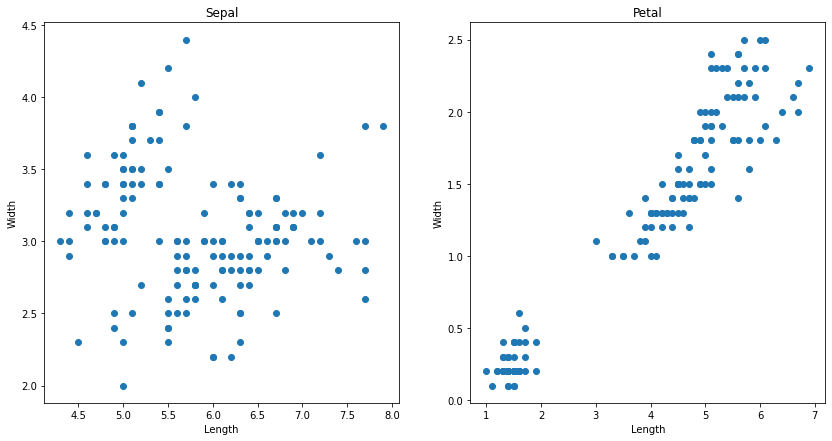

In [8]:
# Defina o tamanho
plt.figure(figsize=(14,7))
 
# Plote
plt.subplot(1, 2, 1) 

plt.scatter(x.Sepal_Length, x.Sepal_Width)
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width)
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Petal')

O tamanho dos dados na era moderna não é apenas um desafio para o hardware do computador, mas também um gargalo principal para o desempenho de muitos algoritmos de aprendizado de máquina. O principal objetivo de uma análise de PCA é identificar padrões nos dados; A PCA visa detectar a correlação entre as variáveis. Se existir uma forte correlação entre as variáveis, a tentativa de reduzir a dimensionalidade só faz sentido. Em poucas palavras, é disso que se trata o PCA: encontrar as direções de variação máxima em dados de alta dimensão e projetá-los em um subespaço dimensional menor enquanto retém a maioria das informações.

Como o intervalo de valores dos dados brutos varia muito, em alguns algoritmos de aprendizado de máquina, as funções objetivas não funcionarão corretamente sem normalização. Por exemplo, a maioria dos classificadores calcula a distância entre dois pontos pela distância euclidiana. Se um dos recursos tiver uma ampla faixa de valores, a distância será regida por esse recurso específico. Portanto, o alcance de todas as feições deve ser normalizado para que cada feições contribua aproximadamente proporcionalmente à distância final.

Dados não dimensionados também podem retardar ou até mesmo impedir a convergência de muitos estimadores baseados em gradiente. Existem vários métodos para normalizar dados. Para este tutorial, vamos usar o StandardScaler do scikit-learn.

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [10]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crie o scaler
scaler = StandardScaler()

# Crie a estância de PCA
pca = PCA()

# Fit_transform 
X_norm = scaler.fit_transform(x)
pca.fit(X_norm)

PCA()

### Plote a importância das variáveis

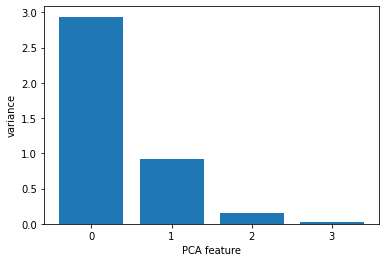

In [11]:
features = range(0, 4)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Em um exercício anterior, você descobriu que a "dimensão intrínseca" era cerca de `k<4` do conjunto de dados da íris. Agora use o PCA para reduzir a dimensionalidade do conjunto de dados da íris, retendo apenas os 2 componentes mais importantes.

Já fomos dimensionados acima, e está disponível como `X_norm`.

### Crie uma instância do PCA chamada pca com `n_components=2`.

In [12]:
pca = PCA(n_components=2)

### Use o método `.fit()` de pca para ajustá-lo aos dados de íris escalonados `X_norm`.

In [13]:
pca.fit(X_norm)

PCA(n_components=2)

### Use o método `.transform()` do pca para transformar o `X_norm`. Atribua o resultado a pca_features.

In [14]:
pca_features = pca.transform(X_norm)

### Plote o resultado

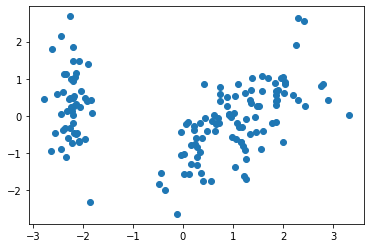

In [15]:
plt.scatter(pca_features[:, 0], pca_features[:, 1])

A partir do gráfico de dispersão do exercício anterior, você viu que os pontos parecem se separar em 3 grupos. Agora você criará um modelo do KMeans para encontrar 3 clusters e ajustá-lo aos pontos de dados do exercício anterior. Depois que o modelo for ajustado, você obterá os rótulos de cluster para alguns novos pontos usando o método `.predict()`.

Você recebe os pontos do array do exercício anterior e também um array new_points.

In [16]:
from sklearn.cluster import KMeans

### Usando o `KMeans()`, crie uma instância do KMeans chamada model para encontrar 3 clusters. Para especificar o número de clusters, use o argumento de palavra-chave `n_clusters`.

In [17]:
model = KMeans(n_clusters=3)

### Fite o modelo

In [18]:
model.fit(X_norm)

KMeans(n_clusters=3)

In [19]:
labels = model.labels_

Use a função `pd.crosstab()` em `df['labels']` e `df['variedades']` para contar o número de vezes que cada espécie de íris coincide com cada rótulo de cluster. Atribuir o resultado a `ct`

In [20]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(pca_features)
df = pd.DataFrame({'labels': labels, 'species': iris_species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          39         16
1            50           0          0
2             0          11         34
